In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [28]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [29]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [30]:
'{:%B %Y}'.format(curr_month)

'August 2017'

<h2>Основная таблица</h2>

In [31]:
rep_2016_17 = report['2016':] # данные с 2016 по н.в.
rep_2016_17

channels                             goals                       
             yandex google go.mail.ru  bry  cpc order basket contact measure
2016-01-31     4471   1253        537  123  316     6    160     367      16
2016-02-29     5630   1683        597   88  543    19    264     533      10
2016-03-31     5946   1641        530  101  514    22    217     571      20
2016-04-30     5887   1470        479   69  228    24    196     484      12
2016-05-31     5846   1183        361   87    0    21    243     485      27
2016-06-30     5913   1134        351   76    0    12    257     478      17
2016-07-31     5166   1108        364   58    0    15    213     396      20
2016-08-31     4689   1120        348   59    0    30    308     349      18
2016-09-30     4244   1071        302   53    0     6    238     321      15
2016-10-31     4153   1711        329   38    0     6    210     357      28
2016-11-30     3853   2491        304   46    0    14    224     436      21
2016-12-31     2781   2551        291  606    0    16    139     358      15
2017-01-31     2949   3084        375  511    0     4    243     355       8
2017-02-28     2701   2414        282  486    0     8    197     311      14
2017-03-31     2590   2283        284  426    0    11    157     298      11
2017-04-30     1890   2390        243  395    0    10    123     260      31
2017-05-31     2006   2584        110  389    0     4    106     221      29
2017-06-30     2048   2164        154  407    0     7    137     182      24
2017-07-31     2218   2172        147  316    0     4     81     221      16
2017-08-31     1995   1892         98  191    0     1     67     197      31

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [32]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                            goals                       
             yandex google go.mail.ru  bry cpc order basket contact measure
2017-08-31     -223   -280        -49 -125   0    -3    -14     -24      15

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

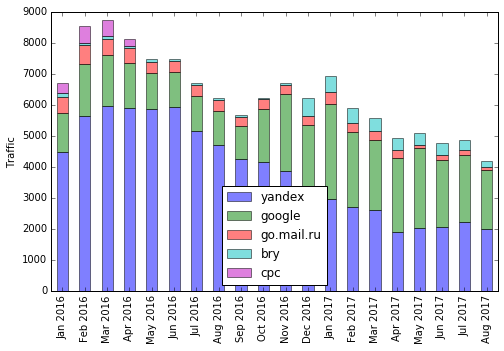

In [33]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2016_17.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2016_17.index]);

<h3>Линейная диаграмма изменений трафика</h3>

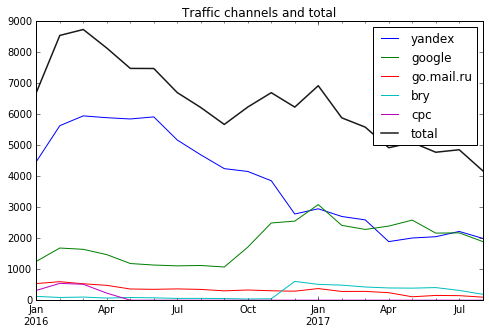

In [34]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2016_17.channels.plot(ax=ax);
rep_2016_17.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [24]:
kw = 'keyword visit'.split()

In [35]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
bing   0                                       двери под ключ     10
       1                                   двери с фурнитурой     10
       2                               входные двери недорого      9
       3                       двери с доставкой и установкой      9
       4                                    двери белорусские      8
       5                                      двери в наличии      8
       6                                          двери верда      8
       7                                         двери книжка      8
       8                                       двери в ванную      7
       9                                       двери недорого      7
       10                        межкомнатные двери с замками      7
       11                            установка входных дверей      7
       12                                  двери межкомнатные      6
       13                                   арки межкомнатные      5
       14                                          двери купе      5
       15                                 двери металлические      5
       16                                  межкомнатные двери      5
       17                                               двери      4
       18                                    двери со скидкой      4
       19                                 двери эмалированные      4
       20                               дешевые входные двери      4
       21                                              np - /      3
       22                                      двери гармошка      3
       23                                       двери экошпон      3
       24                                         двери эмаль      3
       25                                     доставка дверей      3
       26                             интернет магазин дверей      3
       27                                    двери со стеклом      2
       28                         магазин межкомнатных дверей      2
       29                             арки межкомнатные dooru      1
...                                                       ...    ...
yandex 609                  складная импортная дверь на кухню      1
       610                      складные двери для кухни цена      1
       611          сколько стоит дверное полотно без коробки      1
       612  сколько стоит дверь которая полотно складывает...      1
       613                       сколько стоит дверь на кухню      1
       614   сколько стоит установить дверь на кухню в москве      1
       615           сменить дверное полотно на входной двери      1
       616          сосновые двери для улицы сплошное полотно      1
       617  сплошное дверное полотно из массива ясеня купи...      1
       618                стандартный размер дверного полотна      1
       619                            стекло в кухонную дверь      1
       620                            стекло на дверь в кухню      1
       621                             стекло на кухню дверце      2
       622                     стеклянная дверь на кухню фото      1
       623                   стоимость дверной механизм булат      1
       624                          стразы на дверное полотно      1
       625    типы межкомнатных дверей по конструкции полотна      1
       626                              толщина полотна двери      1
       627          у кого какая дверь на кухне отзывы с фото      1
       628                              убрать дверь на кухню      1
       629             узкое полотно половинку складной двери      1
       630             условная дверь между комнатой и кухней      1
       631                          установить дверь на кухню      1
       632          установка двери на кухню в панельном доме      1
       633              установка дверного полотна с коробкой      1
       634     установка стекляной двери на кухню без откосов      1
       635                            фабрика дверны

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [36]:
data[kw].xs(0, level=1)

,keyword,visit
bing,двери под ключ,10
go.mail.ru,(not set),98
google,np - /?cnt=catalog&r=2438,202
rambler,купить арку с узким наличником,1
yahoo,np - /,3
yandex,(not set),1310


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [37]:
data_grupped = data.groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.ix[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0                                     двери под ключ     10
           1                                 двери с фурнитурой     10
           2                             входные двери недорого      9
           3                     двери с доставкой и установкой      9
           4                                  двери белорусские      8
go.mail.ru 0                                          (not set)     98
google     0                          np - /?cnt=catalog&r=2438    202
           1                          np - /?cnt=catalog&r=1428    108
           2                                             np - /     92
           3                                   np - /?pid=pokaz     78
           4                             дверные полотна купить     29
rambler    0                     купить арку с узким наличником      1
           1                               румянцево арка орфей      1
           2                                    узкие наличники      1
yahoo      0                                             np - /      3
           1                          np - /?cnt=catalog&r=1010      1
           2                          np - /?cnt=catalog&r=1236      1
           3                          np - /?cnt=catalog&r=1428      1
           4                          np - /?cnt=catalog&r=2438      1
yandex     0                                          (not set)   1310
           1  межкомнатные двери недорого с установкой под ключ      8
           2                                       took-took.ru      7
           3                                 двери с установкой      2
           4                                   интернет магазин      2